In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# loading the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') 

In [3]:
# information regarding the dataframe
df.info 

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [4]:
# gives number of rows and columns in the dataframe
df.shape 

(5572, 5)

In [5]:
# extracting only first two columns named v1 and v2
df = df[['v1','v2']] 

In [6]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# renaming columns of the dataframe
df.columns = ["label","text"] 

In [8]:
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# number of duplicate rows
df.duplicated().sum() 

403

In [10]:
# removing duplicate rows
df.drop_duplicates(inplace=True) 

C:\Users\Akhil Reddy N\AppData\Local\Temp\ipykernel_1308\3848929746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [11]:
df.describe()

,label,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [12]:
# number of rows under each class
df['label'].value_counts() 

label
ham     4516
spam     653
Name: count, dtype: int64

In [13]:
# mapping spam to 1 and not spam to 0
df['label'] = df['label'].map({'ham':0,'spam':1}) 

C:\Users\Akhil Reddy N\AppData\Local\Temp\ipykernel_1308\4000033866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham':0,'spam':1})


In [14]:
df.head(5)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
print(df['text'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [16]:
X = df['text']
y = df['label']

In [17]:

# Splitting the dataset in test dataset and train dataset
# test dataset contains 20% of the dataset and train dataset contains 80%
# stratify splits the dataset in a such a way that preserves the same proportions of examples in each class as observed in the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10,shuffle=True) 

In [18]:
# Hyperparameter tuning using gridsearchcv
# Model used for classification is SVM classifier
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf','linear'],
              'degree': [2,3,4]}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [19]:
estimators = [
    ('encoder',TfidfVectorizer()), 
    ('clf',grid)
]

In [20]:
# Creating a pipeline
pipe = Pipeline(steps=estimators)

In [21]:
pipe.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.873 total time=   0.7s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.873 total time=   0.6s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.874 total time=   0.6s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.874 total time=   0.6s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.874 total time=   0.7s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.915 total time=   0.4s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.908 total time=   0.4s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.907 total time=   0.4s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.909 total time=   0.4s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.918 total time=   0.4s
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.4s
[CV 2/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.873 tota

Pipeline(steps=[('encoder', TfidfVectorizer()),
                ('clf',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10, 100],
                                          'degree': [2, 3, 4],
                                          'gamma': [1, 0.1, 0.01, 0.001],
                                          'kernel': ['rbf', 'linear']},
                              verbose=3))])

In [22]:
y_pred = pipe.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       917
           1       0.89      0.99      0.94       117

    accuracy                           0.98      1034
   macro avg       0.94      0.99      0.96      1034
weighted avg       0.99      0.98      0.98      1034



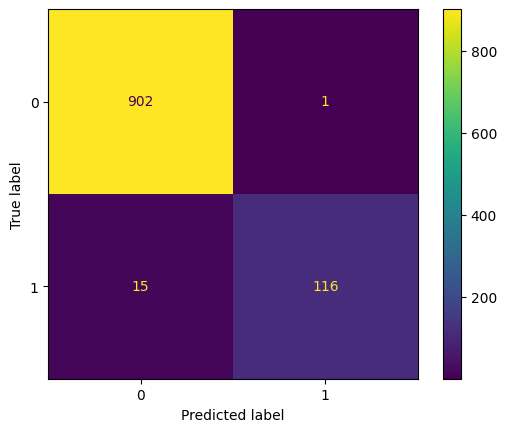

In [23]:
cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_)
disp.plot()
plt.show()

In [24]:
print(accuracy_score(y_pred,y_test))

0.9845261121856866


In [25]:
m = ["Congratulations! You've won a $500 Amazon gift card. Claim it here [Link]."]
label = ("Spam" if pipe.predict(m)[0] else "Not spam")
print(label)

Spam


In [26]:
# Saving the model using pickle
import pickle

In [27]:
pickle.dump(pipe,open("saved_model.pkl",'wb'))

In [28]:
# You can use this model in a different file
model1 = pickle.load(open("saved_model.pkl",'rb'))

In [29]:
m = ["Hello! Just a reminder about our team meeting tomorrow at 10 AM. Looking forward to discussing the upcoming project."]
label = ("Spam" if model1.predict(m)[0] else "Not spam")
print(label)

Not spam


In [30]:
# Saving the model using joblib
import joblib

In [31]:
joblib.dump(pipe,"saved_model.joblib")

['saved_model.joblib']

In [32]:
# You can use this model in a different file
model2 = joblib.load("saved_model.joblib")

In [33]:
m = ["ACTION REQUIRED. Please verify your Bank of America account information to avoid a hold on your account. Click here to confirm: [Link"]
label = ("Spam" if model2.predict(m)[0] else "Not spam")
print(label)

Spam
